<img src ='https://i.pinimg.com/originals/f7/0d/a5/f70da59711a903515d6aed0ee62b92cc.jpg' align = "center"><br><br>
# Estudo acerca das vendas de jogos de videogames durante a História<br><br>
Este notebook apresenta alguns estudos a respeito de dados encontrados no dataset <a href="https://www.kaggle.com/datasets/gregorut/videogamesales">Video Game Sales</a> postado pelo usuário Gregory Smith no Kaggle, que contém informações relevantes a respeito de vendas de jogos de videogames durante determinado período.

In [1]:
# Importando bibliotecas
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
plt.style.use('ggplot')

In [2]:
# Carregando o Dataset
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Entendendo o dataset<br>
Podemos observar que o dataset é composto de 11 colunas e 16.598 linhas. Para compreender melhor a natureza dos dados contidos no dataset, devemos buscar entender melhor qual é o conteúdo de cada coluna. <br>
- **Rank**: Se trata da posição daquele determinado jogo no *ranking* de vendas;
- **Name**: Se trata do título do jogo;
- **Platform**: Se trata do console em que o jogo foi lançado;
- **Year**: Se refere ao ano de lançamento daquele título;
- **Genre**: Se trata do gênero daquele jogo;
- **Publisher**: Empresa responsável pela publicação do jogo;
- **NA_Sales**: Vendas na América do Norte, em milhões de dólares;
- **EU_Sales**: Vendas na Europa, em milhões de dólares;
- **JP_Sales**: Vendas no Japão, em milhões de dólares;
- **Other_Sales**: Vendas no em outras regiões além de Japão, Europa e América do Norte;
- **Global_Sales**: Total de vendas mundiais.

In [3]:
# Traduzindo as colunas para PT-BR com columns
df.columns = ['Posição de venda','Jogo','Console','Ano de Lançamento','Gênero','Publicadora',
             'Vendas na América do Norte', 'Vendas na Europa', 'Vendas no Japão',
             'Vendas em outras regiões', 'Vendas global']
# Visualizando dataframe
df.head()

,Posição de venda,Jogo,Console,Ano de Lançamento,Gênero,Publicadora,Vendas na América do Norte,Vendas na Europa,Vendas no Japão,Vendas em outras regiões,Vendas global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Verificando formado da coluna Ano de Lançamento
df['Ano de Lançamento'].dtypes

dtype('float64')

In [5]:
# Como a coluna Ano de Lançamento se trata de valores inteiros, a converteremos para INT
df['Ano de Lançamento'] = df['Ano de Lançamento'].astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

#### Atenção!<br><br>
Ao tentar converter o conteúdo da coluna **Ano de Lançamento** para INT, recebemos um erro, provavelmente oriundo do fato de que há valores não-numéricos (Not a Number) nesta coluna. Usaremos o método *fillna()* para substituir estes registros pelo número 0

In [6]:
# Preenchendo NaN com 0
df['Ano de Lançamento'] = df['Ano de Lançamento'].fillna(0)

In [7]:
# Vendo se ainda há registros NaN
df[df['Ano de Lançamento'].isnull()].head()

,Posição de venda,Jogo,Console,Ano de Lançamento,Gênero,Publicadora,Vendas na América do Norte,Vendas na Europa,Vendas no Japão,Vendas em outras regiões,Vendas global


**Perfeito!** Não existem mais dados faltantes na coluna de ano de lançamento

In [8]:
# Realizando a conversão novamente dos dados para INT
df['Ano de Lançamento'] = df['Ano de Lançamento'].astype(int)

In [9]:
# Visualizando novamente o formato dos dados registrados na coluna Ano de Lançamento
df['Ano de Lançamento'].dtype

dtype('int32')

**Perfeito!** Os anos não aparecerão mais como números decimais.

In [10]:
# Visualizando Dataframe
df.head()

,Posição de venda,Jogo,Console,Ano de Lançamento,Gênero,Publicadora,Vendas na América do Norte,Vendas na Europa,Vendas no Japão,Vendas em outras regiões,Vendas global
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
# Como realizamos a tradução das colunas, iremos realizar a tradução dos gêneros.
# Antes disso, precisamos ver quais gêneros existem em nosso dataframe
df.Gênero.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [12]:
# Usando o método replace() para realizar a tradução dos valores únicos de gênero
df.Gênero.replace({'Sports': 'Esporte','Racing' : 'Corrida', 'Role-Playing' : 'RPG',
                  'Puzzle' : 'Quebra-cabeça', 'Misc' : 'Diversos', 'Shooter' : 'Tiro',
                  'Simulation' : 'Simulador', 'Action' : 'Ação', 'Fighting' : 'Luta',
                  'Adventure' : 'Aventura', 'Strategy' : 'Estratégia'}, inplace = True)
# Verificando os novos valores
df.Gênero.unique()

array(['Esporte', 'Platform', 'Corrida', 'RPG', 'Quebra-cabeça',
       'Diversos', 'Tiro', 'Simulador', 'Ação', 'Luta', 'Aventura',
       'Estratégia'], dtype=object)

In [13]:
# Observa-se que faltou traduzir o gênero *Platform*
df.Gênero.replace({'Platform':'Plataforma'}, inplace = True)

# Verificando novamente as traduções
df.Gênero.unique()

array(['Esporte', 'Plataforma', 'Corrida', 'RPG', 'Quebra-cabeça',
       'Diversos', 'Tiro', 'Simulador', 'Ação', 'Luta', 'Aventura',
       'Estratégia'], dtype=object)

In [14]:
# Verificando quais consoles estão presentes no Dataframe
df.Console.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [15]:
# Verificando o período de lançamentos que o dataset aborda
np.sort(df['Ano de Lançamento'].unique())

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020])

Até aqui, pudemos observar que o dataset faz o ranking de vendas de jogos lançados entre o ano de 1980 até 2020 para diversas plataformas, como o Super Nintendo, PlayStation 2, Xbox One, etc.

# Visualizando os Dados

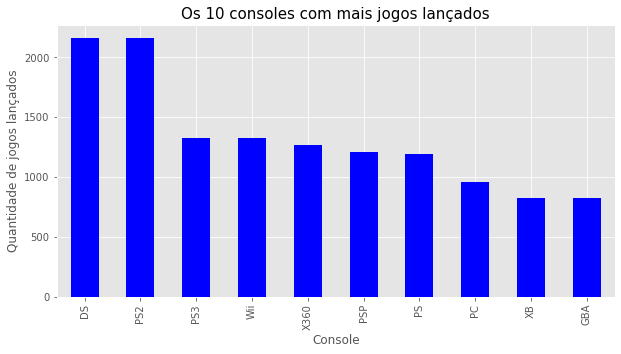

In [16]:
# Criando um gráfico de barras dos 10 videogames com mais títulos lançados
df.Console.value_counts().head(10).plot(kind = 'bar', figsize=(10,5), color = 'blue')
plt.title('Os 10 consoles com mais jogos lançados', size = 15)
plt.xlabel('Console')
plt.ylabel('Quantidade de jogos lançados')
plt.show()

In [17]:
# Verificando os números do gráfico acima
df.Console.value_counts().head(10)

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: Console, dtype: int64

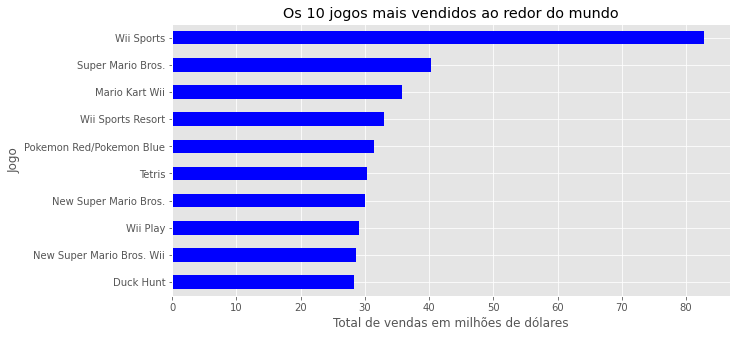

In [18]:
# Atribuindo uma variável aos 10 jogos mais vendidos e o número global de vendas
top10_games = df[['Jogo','Vendas global']].head(10).set_index('Jogo').sort_values('Vendas global',
                                                                                 ascending = True)
top10_games.plot(kind='barh', figsize=(10,5), color = 'blue', legend = False)
plt.title('Os 10 jogos mais vendidos ao redor do mundo')
plt.xlabel('Total de vendas em milhões de dólares')
plt.show()

In [19]:
# Verificando os números do gráfico acima e o ano de lançamento dos títulos
df[['Jogo','Vendas global','Ano de Lançamento']].head(10).set_index('Jogo').sort_values(
    'Vendas global',ascending = False)

,Vendas global,Ano de Lançamento
Jogo,,
Wii Sports,82.74,2006
Super Mario Bros.,40.24,1985
Mario Kart Wii,35.82,2008
Wii Sports Resort,33.00,2009
Pokemon Red/Pokemon Blue,31.37,1996
Tetris,30.26,1989
New Super Mario Bros.,30.01,2006
Wii Play,29.02,2006
New Super Mario Bros. Wii,28.62,2009


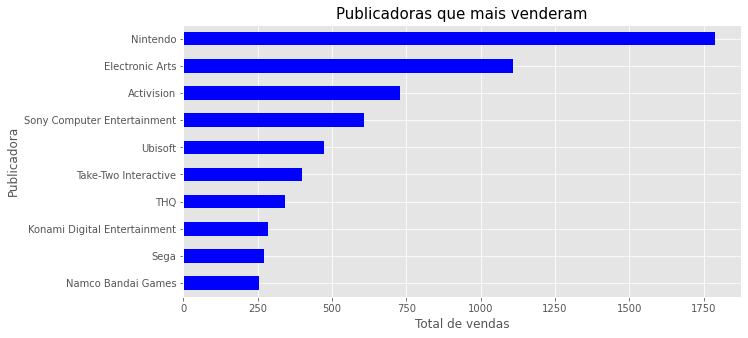

In [20]:
# Visualizando o total de vendas por publicadora
df.pivot_table('Vendas global', ['Publicadora'], aggfunc='sum').reset_index().set_index('Publicadora').sort_values(
    'Vendas global', ascending = True).tail(10).plot(kind = 'barh', figsize=(10,5),
                                                      color = 'blue', legend = None)
plt.title('Publicadoras que mais venderam', size = 15)
plt.xlabel('Total de vendas')
plt.ylabel('Publicadora')
plt.show()

In [21]:
# Visualizando os números do gráfico acima no dataframe
df.pivot_table('Vendas global', ['Publicadora'], aggfunc='sum').reset_index().set_index('Publicadora').sort_values(
    'Vendas global', ascending = False).head(10)

,Vendas global
Publicadora,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72
Take-Two Interactive,399.54
THQ,340.77
Konami Digital Entertainment,283.64
Sega,272.99


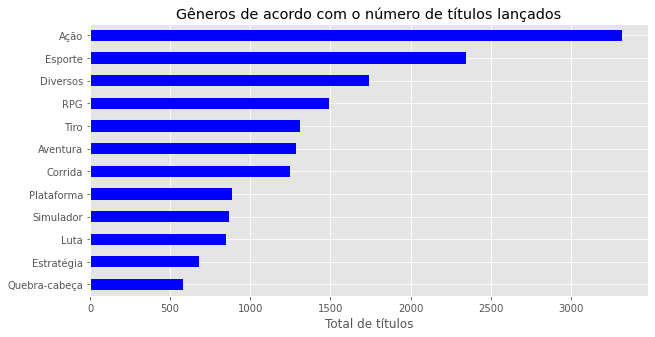

In [22]:
# Vendo como estão distribuídos os gêneros dos jogos do dataset
df.Gênero.value_counts(ascending=True).plot(kind = 'barh', figsize=(10,5), color = 'blue', legend = False)
plt.title('Gêneros de acordo com o número de títulos lançados')
plt.xlabel('Total de títulos')
plt.show()

In [23]:
# Visualizando a porcentagem de gêneros por títulos
pct_genero = (df.Gênero.value_counts(normalize=True) * 100).round(2)
pct_genero

Ação             19.98
Esporte          14.13
Diversos         10.48
RPG               8.96
Tiro              7.89
Aventura          7.75
Corrida           7.53
Plataforma        5.34
Simulador         5.22
Luta              5.11
Estratégia        4.10
Quebra-cabeça     3.51
Name: Gênero, dtype: float64

In [24]:
# Criando um dataframe para visualizar o número de jogos lançados para cada console em cada gênero
genre_platform = pd.crosstab(df['Console'], df['Gênero'])
# Criando uma coluna que calcule o total de jogos port plataforma de acordo com o gênero
genre_platform['Total'] = genre_platform.sum(axis=1)
# Visualizando o dataframe
genre_platform.head()

Gênero,Aventura,Ação,Corrida,Diversos,Esporte,Estratégia,Luta,Plataforma,Quebra-cabeça,RPG,Simulador,Tiro,Total
Console,,,,,,,,,,,,,
2600,2,61,6,5,12,0,2,9,11,0,1,24,133
3DO,1,0,0,0,0,0,0,0,1,0,1,0,3
3DS,37,182,11,53,26,15,14,28,20,86,30,7,509
DC,11,3,6,0,10,0,12,2,0,4,1,3,52
DS,240,343,67,393,148,79,36,92,238,200,285,42,2163


C:\Users\luuisotorres\AppData\Local\Temp\ipykernel_8100\3320466661.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top10 = top10_platforms.append(pd.DataFrame(top10_platforms.sum(), columns =['Total']).T,


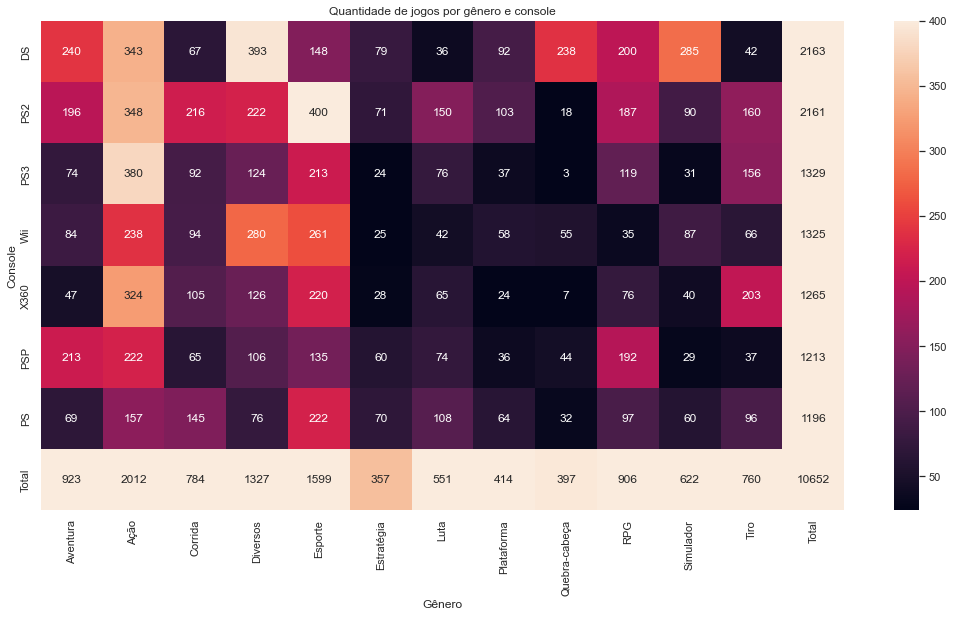

In [25]:
# Usando o dataframe acima para criar um heatmap
top10_platforms = genre_platform[genre_platform['Total'] > 1000].sort_values('Total', 
                                                                             ascending = False)
top10 = top10_platforms.append(pd.DataFrame(top10_platforms.sum(), columns =['Total']).T,
                              ignore_index=False)

sns.set(font_scale = 1)
plt.figure(figsize=(18,9))
sns.heatmap(top10, annot = True, vmax=top10.loc[:'PS',:'Estratégia'].values.max(),
           vmin = top10.loc[:,:'Estratégia'].values.min(),fmt='d')
plt.xlabel('Gênero')
plt.ylabel('Console')
plt.title('Quantidade de jogos por gênero e console')
plt.show()

Através do **heatmap**, conseguimos identificar gêneros populares por plataforma.<br>
Os dois gêneros com mais lançamento para o Nintendo DS, por exemplo, são os de Ação e Diversos, enquanto no PlayStation 2 o gênero de Esporte e Ação têm mais títulos lançados.<br>
É possível observar que o gênero Ação é um dos que mais tem jogos lançados em diversas plataformas.

## PlayStation 2<br><br>
O **PlayStation 2**, console da Sony lançado no Japão em 4 de março de 2000, é o **console mais vendido** de todos os tempos. Vamos fazer alguns estudos a respeito dos jogos lançados para o PS2 presentes neste dataset.

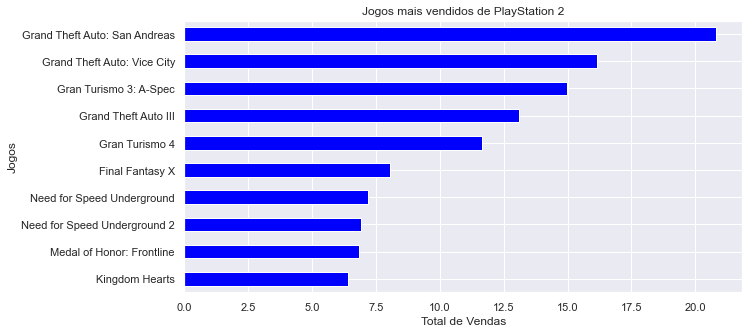

In [26]:
# Visualizando os jogos mais vendidos de PlayStation 2
df.query("Console == 'PS2'")[['Jogo','Vendas global']].set_index('Jogo').sort_values('Vendas global', 
                                                                   ascending = True).tail(10).plot(
    kind = 'barh', figsize=(10,5), color = 'blue', legend = False)
plt.title('Jogos mais vendidos de PlayStation 2')
plt.xlabel('Total de Vendas')
plt.ylabel('Jogos')
plt.show()

In [27]:
# Visuliazando os dados acima no dataframe
df.query("Console == 'PS2'").sort_values('Vendas global', ascending = False).head(10)

,Posição de venda,Jogo,Console,Ano de Lançamento,Gênero,Publicadora,Vendas na América do Norte,Vendas na Europa,Vendas no Japão,Vendas em outras regiões,Vendas global
17,18,Grand Theft Auto: San Andreas,PS2,2004,Ação,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002,Ação,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001,Corrida,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39,Grand Theft Auto III,PS2,2001,Ação,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48,Gran Turismo 4,PS2,2004,Corrida,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
86,87,Final Fantasy X,PS2,2001,RPG,Sony Computer Entertainment,2.91,2.07,2.73,0.33,8.05
104,105,Need for Speed Underground,PS2,2003,Corrida,Electronic Arts,3.27,2.83,0.08,1.02,7.20
113,114,Need for Speed Underground 2,PS2,2004,Corrida,Electronic Arts,2.71,3.02,0.08,1.09,6.90
114,115,Medal of Honor: Frontline,PS2,2002,Tiro,Electronic Arts,2.93,2.75,0.17,0.99,6.83
131,132,Kingdom Hearts,PS2,2002,RPG,Sony Computer Entertainment,3.64,1.20,1.49,0.07,6.40


<AxesSubplot:ylabel='Gênero'>

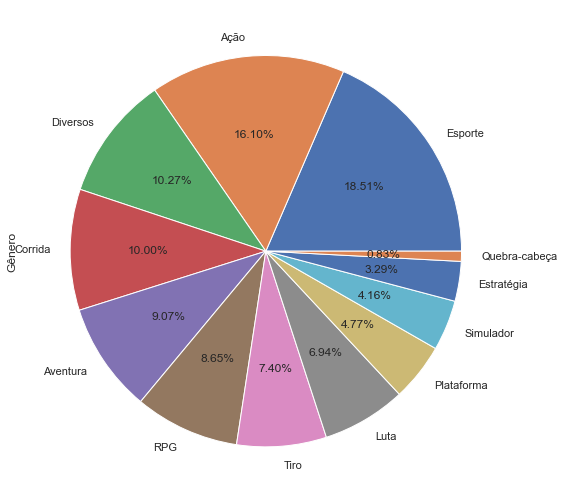

In [28]:
#Visualizando a distribuição dos gêneros de jogos de PlayStation 2
sns.set(rc={'figure.figsize':(12,9)})
df.query("Console == 'PS2'")['Gênero'].value_counts().plot(kind = 'pie', autopct='%.2f%%')

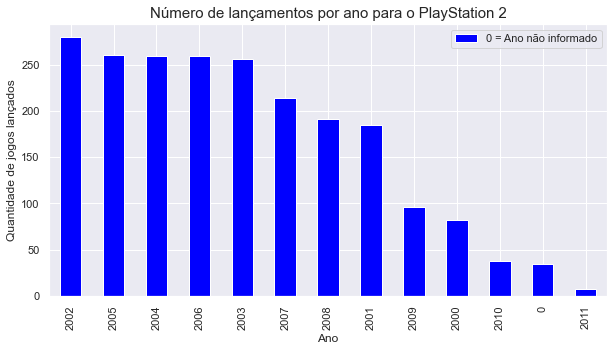

In [29]:
# Visualizando o número de lançamentos anuais para o PS2
fig, ax = plt.subplots()
df.query("Console == 'PS2'").value_counts('Ano de Lançamento').plot(kind = 'bar', figsize=(10,5),
                                                                    color = 'blue', ax = ax)
plt.title('Número de lançamentos por ano para o PlayStation 2', size = 15)
plt.xlabel('Ano')
plt.ylabel('Quantidade de jogos lançados')
ax.legend(['0 = Ano não informado'])
plt.show()

# Conclusão<br><br>
Através do dataset estudado, conseguimos extrair informações relevantes, descobrindo quais consoles tiveram mais jogos lançados, quais publicadoras mais venderam, os gêneros mais populares, tanto de modo geral quanto de cada console específico, além de visualizarmos as maiores vendas dos 10 jogos mais populares.<br>
Após isto, conseguimos visualizar os jogos mais vendidos, gêneros e os lançamentos anuais de jogos para o PlayStation 2, console mais vendido da história.<br>
Este estudo utilizou métodos de análise exploratória de dados e visualização de dados, para que os registros contidos no dataset se transformassem em informações relevantes para conhecermos melhor a respeito do universo de games e suas vendas.